1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

"\nsns.set(rc = {'figure.figsize':(16,8)})\nsns.heatmap(data_new.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')\n"

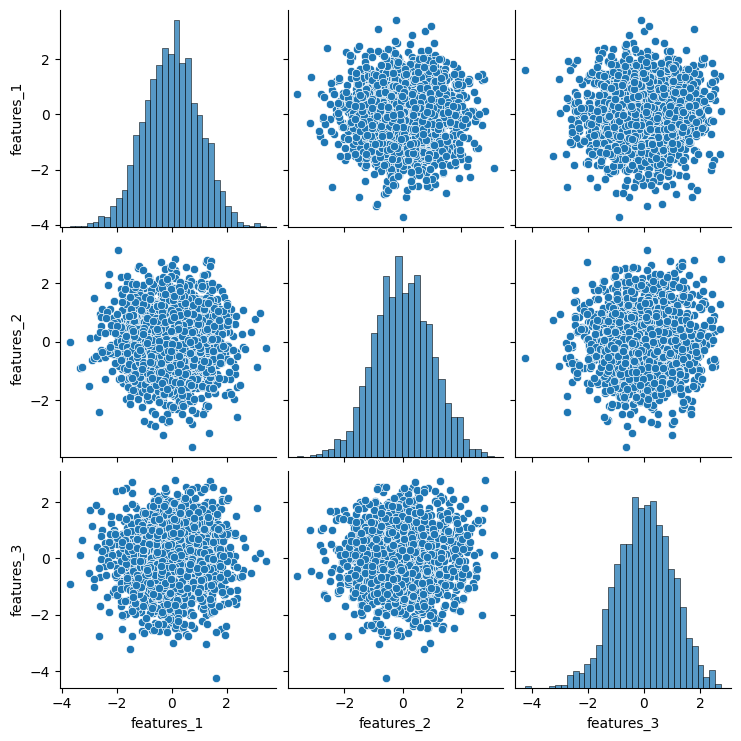

In [3]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

file_name = "regression_generated.csv"
data = pd.read_csv(file_name) 

data_new = data.iloc[:,[1,2,3]]

sns.pairplot(data_new, x_vars = ["features_1","features_2","features_3"], y_vars = ["features_1","features_2","features_3"])

'''
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data_new.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
'''

there is little to no correlation between the features

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

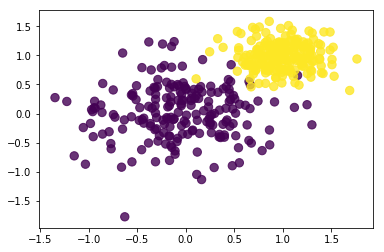

In [24]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

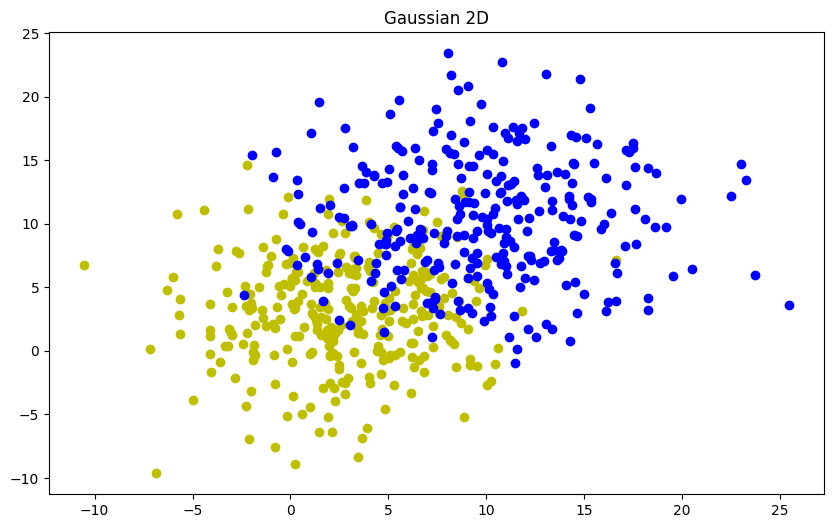

In [15]:
import math

def Gaussian(mn,sd,sz):
    ds = np.random.normal(loc=mn, scale=sd, size=(sz,))
    return ds
        
mn1 = 3
sd1 = 4
mn2 = 10
sd2 = 5
sz = 300

dsx1 = Gaussian(mn1,sd1,sz)
dsy1 = Gaussian(mn1,sd1,sz)
dsx2 = Gaussian(mn2,sd2,sz)
dsy2 = Gaussian(mn2,sd2,sz)

plt.figure(figsize=(10, 6))
plt.scatter(x=dsx1, y=dsy1, marker='o', c='y')
plt.scatter(x=dsx2, y=dsy2, marker='o', c='b')
plt.title("Gaussian 2D")
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
